<a href="https://colab.research.google.com/github/SoparAwayyy/Machine-Learning/blob/main/UAS/UAS_Dwi_Saputra_Sopar_Siagian_Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dwi Saputra Sopar Siagian

1103210220

UAS

Image Classification

DATASET MNIST FASHION

Model CNN



In [1]:
pip install tensorflow

**Import Library:**

In [20]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

**Load Dataset:**

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

# Normalisasi nilai pixel ke rentang [0, 1]
train_images = train_images / 255.0
test_images = test_images / 255.0


**Reshape Data**

In [11]:
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

**Membangun Model CNN:**

In [12]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

**Compiling Model:**

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

**Melatih Model:**

In [14]:
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

Epoch 1/10
1875/1875 [==============================] - 68s 36ms/step - loss: 0.5002 - accuracy: 0.8177 - val_loss: 0.3922 - val_accuracy: 0.8575
Epoch 2/10
1875/1875 [==============================] - 62s 33ms/step - loss: 0.3204 - accuracy: 0.8834 - val_loss: 0.3094 - val_accuracy: 0.8874
Epoch 3/10
1875/1875 [==============================] - 59s 31ms/step - loss: 0.2720 - accuracy: 0.9010 - val_loss: 0.2779 - val_accuracy: 0.8989
Epoch 4/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2427 - accuracy: 0.9097 - val_loss: 0.2775 - val_accuracy: 0.8976
Epoch 5/10
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2195 - accuracy: 0.9193 - val_loss: 0.2737 - val_accuracy: 0.9003
Epoch 6/10
1875/1875 [==============================] - 59s 32ms/step - loss: 0.1968 - accuracy: 0.9266 - val_loss: 0.2586 - val_accuracy: 0.9106
Epoch 7/10
1875/1875 [==============================] - 66s 35ms/step - loss: 0.1805 - accuracy: 0.9327 - val_loss: 0.2565 -

**Evaluasi Model:**

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f'\nTest accuracy: {test_acc}')

313/313 [==============================] - 4s 11ms/step - loss: 0.2792 - accuracy: 0.9124

Test accuracy: 0.9124000072479248


**Visualisasi Hasil Latihan:**

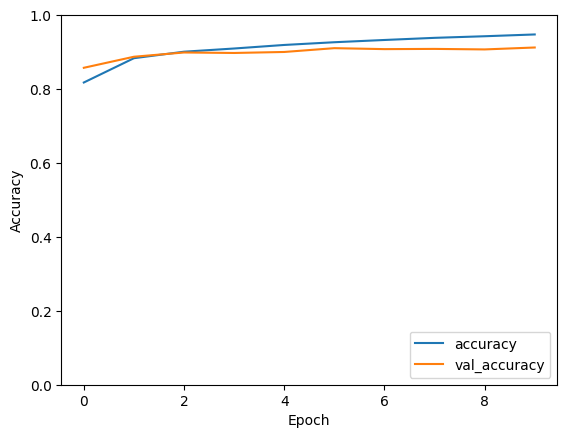

In [16]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

**Membuat Prediksi untuk Data Uji**

In [18]:
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

313/313 [==============================] - 3s 8ms/step


**Membuat dan Menampilkan Confusion Matrix**

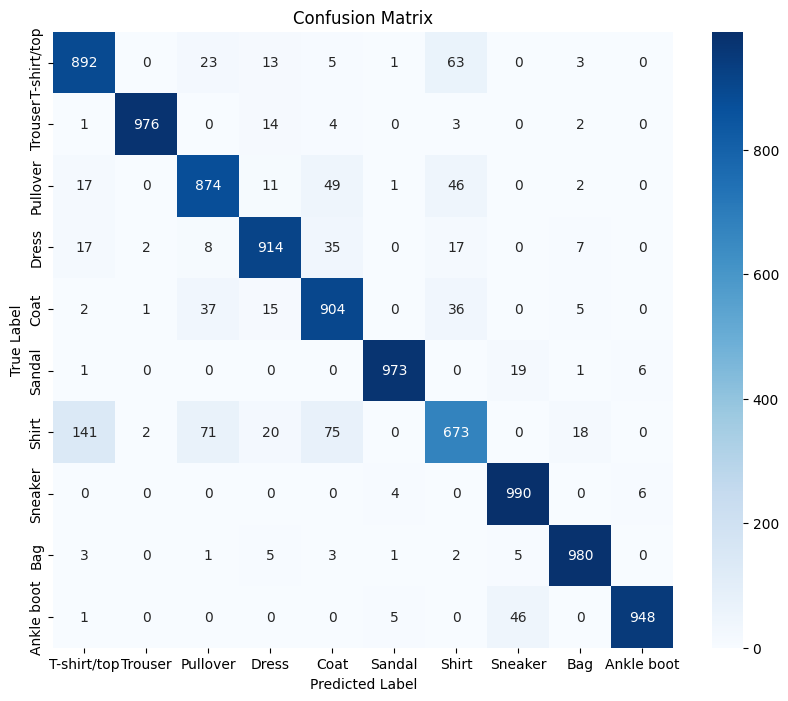

In [21]:
# Buat Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_labels)

# Plot Confusion Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

313/313 [==============================] - 3s 9ms/step


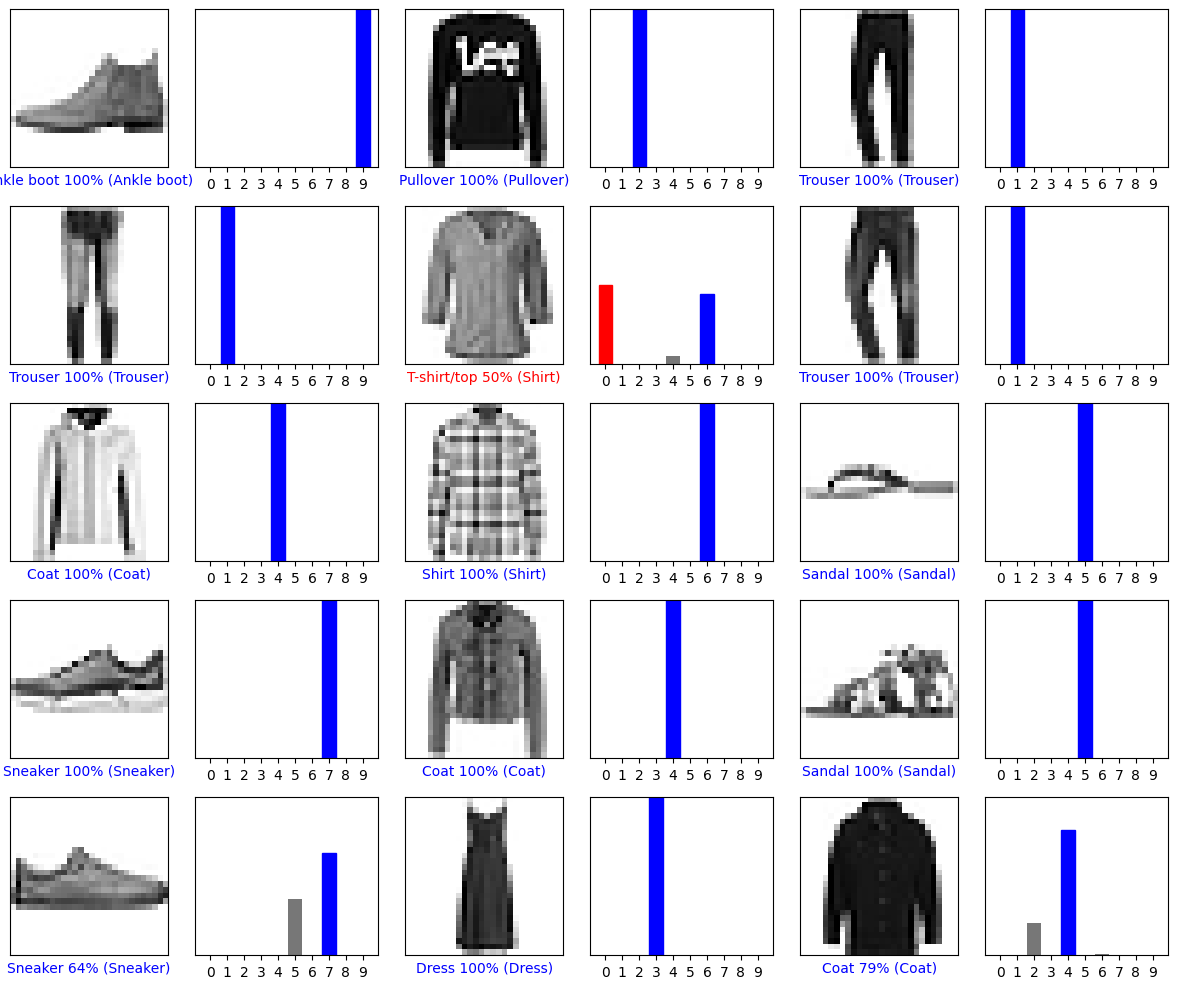

In [17]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
                                         color=color)

def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

predictions = model.predict(test_images)

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()
